In [10]:
import os
import re
import cv2
from cv2 import dnn_superres
import io
import imageio
import time
import matplotlib.pyplot as plt

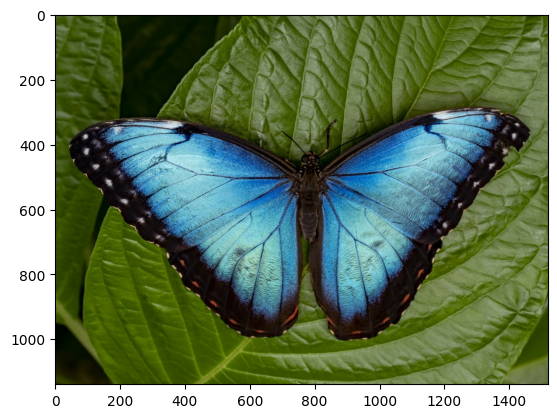

In [2]:
image = cv2.imread("images/butterfly.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()

In [3]:
image.shape

(1139, 1519, 3)

In [4]:
def save_to(img_arr, src_path):
    filename = f"{src_path}"
    cv2.imwrite(filename, img_arr)

In [5]:
def downscaling(img_path):
    rows, cols, _ = map(int, img_path.shape)
    return cv2.cvtColor(cv2.resize(img_path, ((cols // 4), (rows // 4))), cv2.COLOR_BGR2RGB)


def prepare_data(src_dir, dst_dir):
    if not os.path.exists(dst_dir):
        os.makedirs(dst_dir)
    for filename in os.listdir(src_dir):
        if filename.endswith((".jpg", ".jpeg", ".png")):
            img = cv2.cvtColor(cv2.imread(os.path.join(src_dir, filename)), cv2.COLOR_BGR2RGB)
            lowres_img = downscaling(img)
            return cv2.imwrite(f"{dst_dir}/{filename.split('.')[0]}_025x.jpg", lowres_img)

prepare_data("images", "downscaled")

True

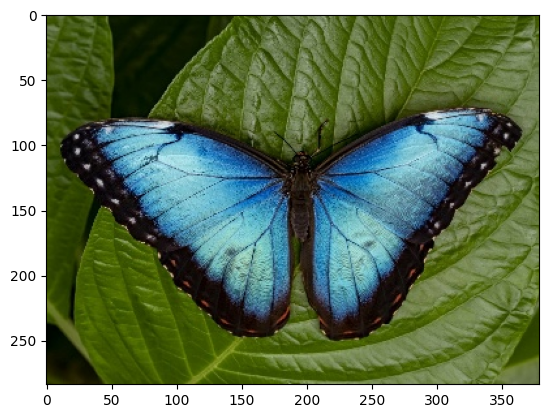

In [6]:
image = cv2.imread("downscaled/butterfly_025x.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()

In [7]:
image.shape

(284, 379, 3)

In [23]:
def preprocessing(img_path, model_path):
    filename = f"{img_path.split('/')[-1]}"
    start_time = time.time()

    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    model_name = model_path.split('/')[-2]
    n_scale = re.search(r'x(\d+)', model_path)
    print(type(n_scale.group(1)))
    superres = dnn_superres.DnnSuperResImpl_create()
    superres.readModel(model_path)
    superres.setModel(model_name, int(n_scale.group(1)))
    
    img_rgb = superres.upsample(img_rgb)
    
    print(f"Processing {img_path} in: {round((time.time() - start_time), 2)} sec.\n====")
    cv2.imwrite(f"result/{filename.split('_')[0]}_{model_path.split('/')[-1].split('.')[0]}.jpg", cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))


In [28]:
preprocessing('downscaled/butterfly_025x.jpg', 'models/lapsrn/LapSRN_x4.pb')

<class 'str'>


Processing downscaled/butterfly_025x.jpg in: 21.31 sec.
====
